## 2.3.- Índice Direccional Medio (ADX)

El Índice Direccional Medio (ADX) es un indicador técnico utilizado para medir la fuerza y dirección de una tendencia. A continuación, se proporciona una explicación detallada sobre la importancia del ADX y algunos casos de uso:

#### Importancia del ADX

El ADX es importante por varias razones clave:

1. **Medición de la Fuerza de la Tendencia**: El ADX se utiliza principalmente para medir la fuerza de la tendencia, sin importar si es alcista o bajista. Un ADX por encima de 25 generalmente indica una tendencia fuerte, mientras que un ADX por debajo de 20 sugiere una tendencia débil o inexistente.

2. **Identificación de Condiciones de Tendencia y Rango**: Ayuda a los traders a distinguir entre condiciones de mercado de tendencia (cuando el ADX es alto) y condiciones de rango (cuando el ADX es bajo). Esto es crucial para seleccionar las estrategias de trading adecuadas.

3. **Confirmación de Señales de Trading**: El ADX puede confirmar señales de otros indicadores técnicos. Por ejemplo, una señal de compra en un mercado con una fuerte tendencia alcista es más confiable.

#### Casos de Uso del ADX

1. **Confirmación de Tendencia**: Los traders utilizan el ADX para confirmar si el mercado está en una tendencia fuerte. Por ejemplo, un ADX por encima de 25 puede confirmar que una tendencia alcista o bajista es fuerte y probable que continúe.

2. **Estrategias de Entrada y Salida**: Algunos traders utilizan el ADX para determinar los puntos de entrada y salida. Por ejemplo, podrían entrar en una posición cuando el ADX sube por encima de 20 y salir cuando el ADX cae por debajo de 20.

3. **Filtro de Señales**: El ADX puede utilizarse como un filtro para evitar operar en mercados sin tendencia. Los traders pueden evitar posiciones largas o cortas si el ADX está por debajo de 20, lo que indica un mercado en rango.

#### Fórmula y Cálculo del ADX

El ADX se calcula en varios pasos:

1. **Calcular el Movimiento Direccional (+DM y -DM)**:
   - $+DM = \text{Máximo Actual} - \text{Máximo Anterior}$ (si el valor es positivo y mayor que la diferencia de mínimos).
   - $-DM = \text{Mínimo Anterior} - \text{Mínimo Actual}$ (si el valor es positivo y mayor que la diferencia de máximos).

2. **Calcular el True Range (TR)**:
   - $ TR = \max[(\text{Máximo Actual} - \text{Mínimo Actual}), \left|\text{Máximo Actual} - \text{Cierre Anterior}\right|, \left|\text{Mínimo Actual} - \text{Cierre Anterior}\right|] $

3. **Calcular los Indicadores Direccionales (+DI y -DI)**:
   - $ +DI = 100 \times \left(\frac{SMMA(+DM, N)}{SMMA(TR, N)}\right) $
   - $ -DI = 100 \times \left(\frac{SMMA(-DM, N)}{SMMA(TR, N)}\right) $

4. **Calcular el Índice Direccional (DX)**:
   - $ DX = 100 \times \frac{|+DI - -DI|}{+DI + -DI} $

5. **Calcular el ADX**:
   - $ ADX = SMMA(DX, N) $

Donde:
- $N$ es el número de períodos.
- $SMMA$ es la Media Móvil Suavizada.

#### Algoritmo:

1. Calcular +DM, -DM y TR.
2. Calcular +DI y -DI.
3. Calcular DX.
4. Calcular ADX.

#### Ejemplo Numérico:

Supongamos que tenemos los siguientes precios de cierre, máximo y mínimo para calcular el ADX con una ventana de 5 días:

| Día | Máximo | Mínimo | Cierre |
|-----|--------|--------|--------|
| 1   | 50     | 45     | 48     |
| 2   | 52     | 46     | 49     |
| 3   | 53     | 47     | 50     |
| 4   | 54     | 48     | 51     |
| 5   | 55     | 49     | 52     |
| 6   | 56     | 50     | 53     |
| 7   | 57     | 51     | 54     |
| 8   | 58     | 52     | 55     |
| 9   | 59     | 53     | 56     |
| 10  | 60     | 54     | 57     |

Cálculo del Día 6 (Ventana: Días 2 a 6)
1. Calcular +DM, -DM y TR.
2. Calcular +DI y -DI.
3. Calcular DX.
4. Calcular ADX.

**Referencias**

1. **Referencias Bibliográficas**:
   - Wilder, J. Welles. *New Concepts in Technical Trading Systems*. Trend Research, 1978. ISBN: 978-0894590276.
   - Murphy, John J. *Technical Analysis of the Financial Markets: A Comprehensive Guide to Trading Methods and Applications*. New York Institute of Finance, 1999. ISBN: 978-0735200661.

2. **Referencias Web**:
   - [Investopedia - Average Directional Index (ADX)](https://www.investopedia.com/terms/a/adx.asp): Una explicación detallada del ADX, incluyendo su fórmula, interpretación y ejemplos prácticos.
   

In [23]:
%pip install pandas_ta
%pip install setuptools
%pip install openpyxl

import yfinance as yf
import datetime as dt
import pandas as pd
import plotly.graph_objects as go
import nbformat
import plotly.io as pio
import pandas_ta as ta
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import os 
import numpy as np 
from plotly.subplots import make_subplots

# traemos los datos

# EJEMPLO CON YAHOO FINANZAS
ticker_symbol = 'BTC-USD'
ticker = yf.Ticker(ticker_symbol)

# Obtener el historial de precios
years=5
end_date= dt.datetime.now() # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los ultimos datos
start_date = end_date- dt.timedelta(365*years) # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los primeros datos
period='5d' # 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
interval='1d' # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

# bajamos los datos
data = ticker.history(start=start_date, end=end_date, interval=interval)

periodo = 50
# nombre_calculada_u = 'BBU_'+str(periodo)+'_calculada'
# nombre_calculada_l = 'BBL_'+str(periodo)+'_calculada'
# nombre_calculada_m = 'BBM_'+str(periodo)+'_calculada'

# nombre_pd ='BB_'+str(periodo)+'_pd'

# nombre_pd_ta_u = 'BBU_'+str(periodo)+'_ta'
# nombre_pd_ta_m = 'BBM_'+str(periodo)+'_ta'
# nombre_pd_ta_l = 'BBL_'+str(periodo)+'_ta'


# nombre_pd_u = 'BBU_'+str(periodo)+'_pd'
# nombre_pd_m = 'BBM_'+str(periodo)+'_pd'
# nombre_pd_l = 'BBL_'+str(periodo)+'_pd'
nombre_columna_low = 'Low'
nombre_columna_high='High'
nombre_columna_close = 'Close'

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# 1. Calculo manual del ADX

# primero se calcula el True Range
TR = [data[nombre_columna_high] - data[nombre_columna_low] , abs(data[nombre_columna_high] - data[nombre_columna_cierre]), abs(data[nombre_columna_low] - data[nombre_columna_cierre]) ]
TR = np.array(TR)
TR = np.max(TR, axis=0)
TR.flatten()

# calculo del DM

array([ 520.69628906,  638.42089844,  392.81542969, ..., 1281.71484375,
       1450.61328125, 2356.21875   ])

In [ ]:
# 2. Calculo del ADX con Pandas


In [24]:
# 3. Calculo del ADX con pandas ta
adx = ta.adx(high=data[nombre_columna_high],low=data[nombre_columna_low],close=data[nombre_columna_close],length=periodo)
data = data.join(adx)

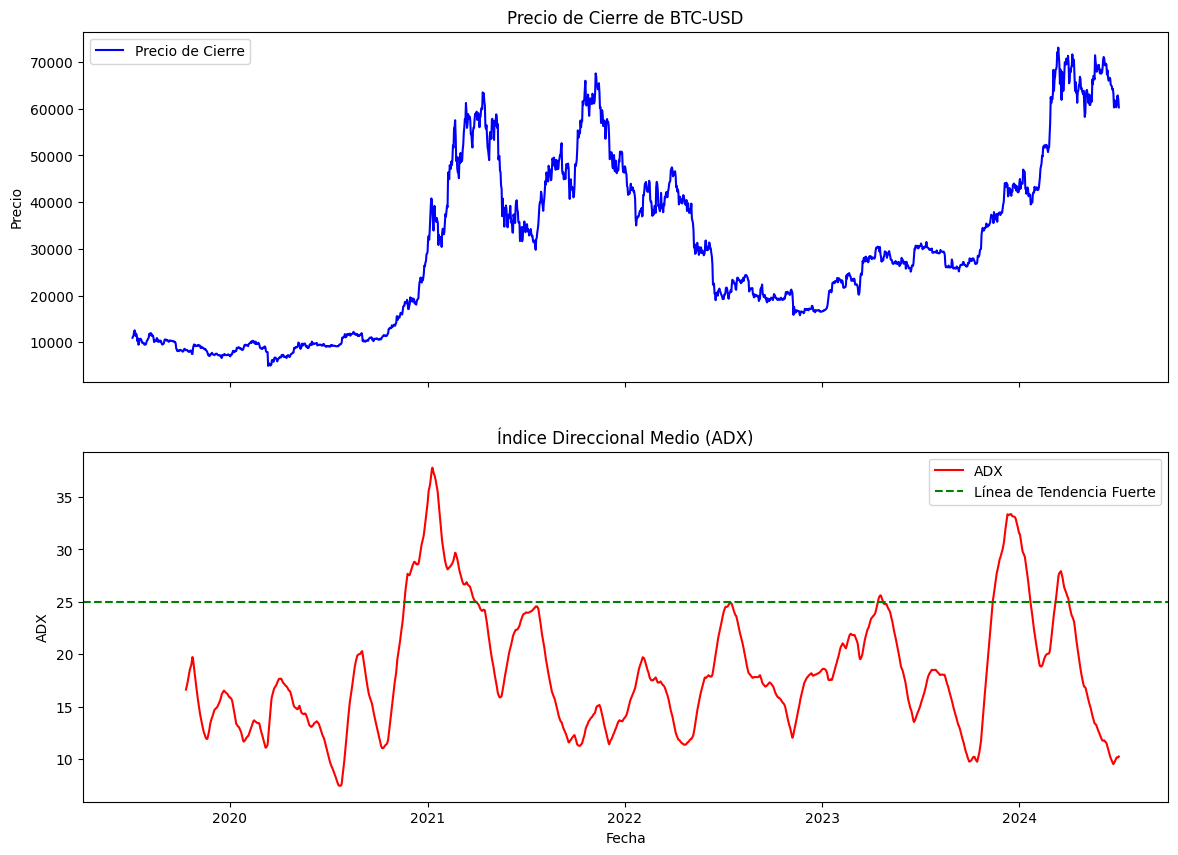

In [17]:
# Configuración del gráfico
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Gráfico de precios
ax[0].plot(data.index, data[nombre_columna_precio], label='Precio de Cierre', color='blue')
ax[0].set_title('Precio de Cierre de BTC-USD')
ax[0].set_ylabel('Precio')
ax[0].legend()

# Gráfico de ADX
ax[1].plot(data.index, data['ADX_50'], label='ADX', color='red')
ax[1].axhline(y=25, color='green', linestyle='--', label='Línea de Tendencia Fuerte')
ax[1].set_title('Índice Direccional Medio (ADX)')
ax[1].set_ylabel('ADX')
ax[1].legend()

plt.xlabel('Fecha')
plt.show()

In [20]:
# Crear figura de subplots en Plotly
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02,
                    subplot_titles=("Precio de Cierre", "ADX (50 periodos)"))

# Añadir gráfico de precio de cierre al subplot superior
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Precio de Cierre', line=dict(color='blue')), row=1, col=1)
fig.update_yaxes(title_text='Precio', row=1, col=1)

# Añadir ADX al subplot inferior
fig.add_trace(go.Scatter(x=data.index, y=data['ADX_50'], mode='lines', name='ADX', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=[25]*len(data), mode='lines', name='Límite ADX = 25', line=dict(color='black', dash='dash')), row=2, col=1)
fig.update_yaxes(title_text='ADX', row=2, col=1)

# Actualizar diseño del gráfico
fig.update_layout(title=f'Precio de Cierre y ADX (50 períodos) - {ticker_symbol}',
                  xaxis_title='Fecha', height=600, showlegend=True)

# Mostrar el gráfico interactivo
fig.show()